<a href="https://colab.research.google.com/github/juacastanori/SyS/blob/main/Discretizacion_Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio en clase - Juan Jerónimo Castaño Rivera

Discretizar la siguiente función continua:

$x(t)=8Cos(100t)+10Sen(20t)-7Cos(300t-\frac{Π}{2})$

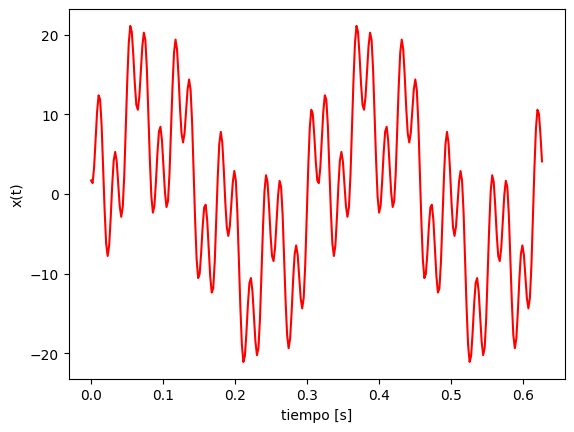

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
A=8
B=10
C=-7
t1=np.pi/50
t2=np.pi/10
t3=np.pi/150
ti=0
T=np.pi/10
tf=2*T
tv=np.arange(ti,tf,t3/10)            #Muestreo
xv=A* np.cos(100*tv)+B* np.sin(20*tv)+C* np.cos(300*tv-np.pi/7)  #Señal en discreta
y=xv
plt.plot(tv,xv,"r")
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

In [15]:
y_min = 0
y_max = 5
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [16]:
yv = my_ceropen(xv,ymin=0,ymax=5)

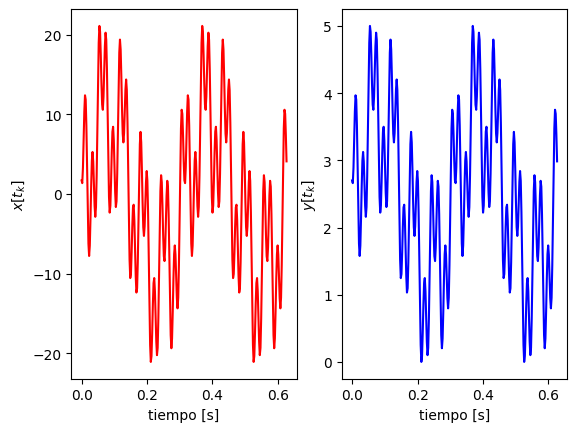

In [17]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [18]:
ycs = my_ceropen(y, ymin=0,ymax=5)
nbits = 3
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits)
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1))
ind = np.argmin(d,axis=1)

In [19]:
def my_cuantizador(yn, vq) :

  Ne = vq.shape[0]
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn)
  return vq[ind]

In [20]:
for i in range(ycs.shape[0]):
   if i==0:
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve))

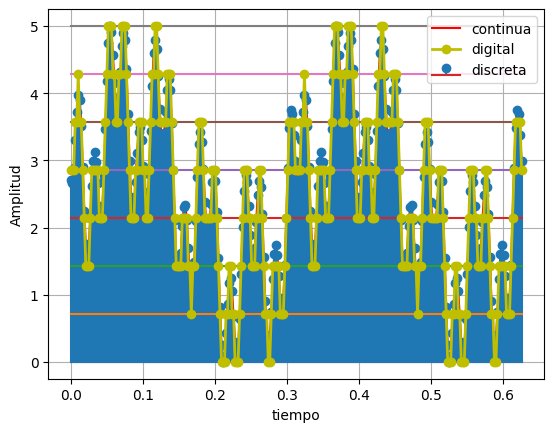

In [25]:
plt.plot(tv,ycs,c='r', label='continua')#cs continua

plt.stem(tv,ycs, label='discreta')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='digital', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.show()

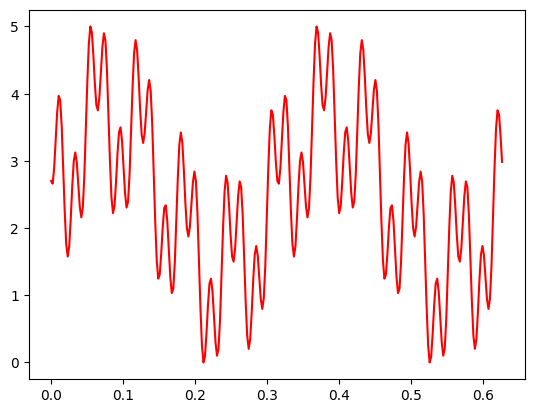

In [23]:
plt.plot(tv,ycs,c='r', label='continua')#cs continua

<StemContainer object of 3 artists>

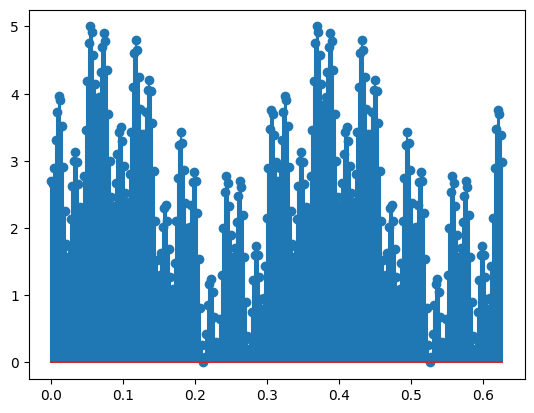

In [24]:
plt.stem(tv,ycs, label='discreta')#cs discreta

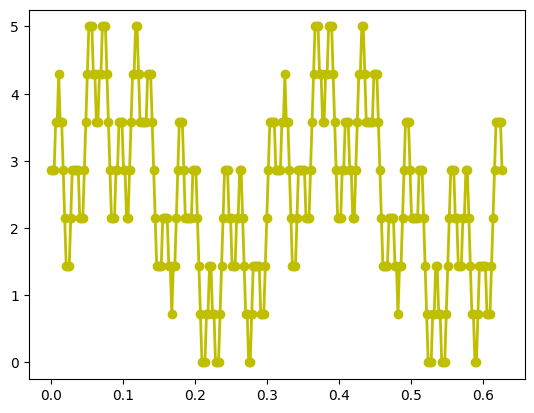

In [26]:
plt.plot(tv,yq,c='y',marker='o',label='digital', linewidth=2) #Digital